<a href="https://colab.research.google.com/github/ehgeraldo/superbowl/blob/master/superbowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados sobre o superbowl com datascience**

**Banco de dados disponível no kaggle:**

**https://www.kaggle.com/timoboz/superbowl-history-1967-2020#superbowl.csv**


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importações dos dados através do drive:**

**Importação de uma imagem sobre o contexto do superbowl:**

In [0]:
from google.colab import files
from IPython.display import Image

In [9]:
upload = files.upload()

Saving superbowl_image.jpg to superbowl_image.jpg


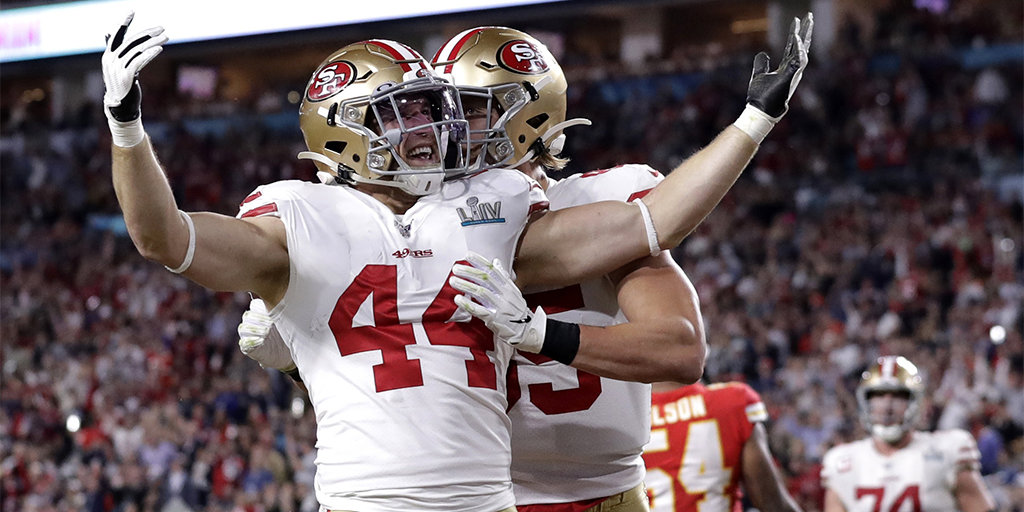

In [10]:
Image('superbowl_image.jpg', width = 1200)

In [11]:
# Importação do pandas como maneira de ler o arquivo para análise:
import pandas as pd

# Denomimando o arquivo CSV como df (dataframe)
df = pd.read_csv('/content/drive/My Drive/superbowl.csv')

# Visualização das primeiras cinco linha de :
df.head()



,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


# Análise preliminar dos dados do dataframe:
 
 **Temos:**
 
 **'data', 'vencedores', 'perdedores', 'nº de pontos', 'cidades dos jogos', 'MVP' (premiação ao melhor jogador).**

In [12]:
# Tipos das variáveis para cada coluna:

df.dtypes

Date          object
SB            object
Winner        object
Winner Pts     int64
Loser         object
Loser Pts      int64
MVP           object
Stadium       object
City          object
State         object
dtype: object

In [13]:
# Tipos de variáveis em cada coluna com a contagem de valores de entrada:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Date          54 non-null object
SB            54 non-null object
Winner        54 non-null object
Winner Pts    54 non-null int64
Loser         54 non-null object
Loser Pts     54 non-null int64
MVP           54 non-null object
Stadium       54 non-null object
City          54 non-null object
State         54 non-null object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [14]:
# Quantidade de (linhas, coluna):

df.shape

(54, 10)

In [15]:
# Quantificação de dados nulos em cada coluna:

df.isnull().sum()

Date          0
SB            0
Winner        0
Winner Pts    0
Loser         0
Loser Pts     0
MVP           0
Stadium       0
City          0
State         0
dtype: int64

In [16]:
# Quantidade de dados por cada coluna:

df.count()

Date          54
SB            54
Winner        54
Winner Pts    54
Loser         54
Loser Pts     54
MVP           54
Stadium       54
City          54
State         54
dtype: int64

In [17]:
# Descrição estatítica dos dados:

df.describe()

,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [18]:
# Quantificação de títulos perdidos por time:

df['Loser'].value_counts()

Denver Broncos          5
New England Patriots    5
Buffalo Bills           4
Minnesota Vikings       4
Miami Dolphins          3
Dallas Cowboys          3
Seattle Seahawks        2
Cincinnati Bengals      2
Philadelphia Eagles     2
Washington Redskins     2
Atlanta Falcons         2
Oakland Raiders         2
Carolina Panthers       2
Pittsburgh Steelers     2
San Francisco 49ers     2
Los Angeles Rams        2
St. Louis Rams          1
Kansas City Chiefs      1
Tennessee Titans        1
Indianapolis Colts      1
San Diego Chargers      1
New York Giants         1
Baltimore Colts         1
Arizona Cardinals       1
Green Bay Packers       1
Chicago Bears           1
Name: Loser, dtype: int64

In [19]:
# Quantificação de títulos para cada time:

df['Winner'].value_counts()

New England Patriots    6
Pittsburgh Steelers     6
Dallas Cowboys          5
San Francisco 49ers     5
New York Giants         4
Green Bay Packers       4
Washington Redskins     3
Denver Broncos          3
Miami Dolphins          2
Oakland Raiders         2
Baltimore Ravens        2
Kansas City Chiefs      2
Indianapolis Colts      1
Los Angeles Raiders     1
Philadelphia Eagles     1
Tampa Bay Buccaneers    1
St. Louis Rams          1
New York Jets           1
New Orleans Saints      1
Chicago Bears           1
Baltimore Colts         1
Seattle Seahawks        1
Name: Winner, dtype: int64

In [20]:
! pip install plotly

In [21]:
!pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /usr/local/lib/python3.6/dist-packages (0.17.3)


In [0]:
import plotly
plotly.__version__

import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objects as go

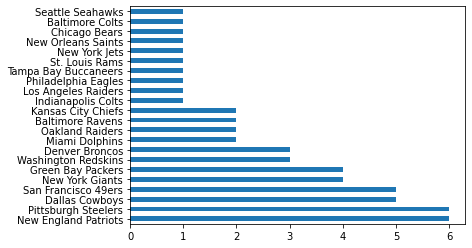

In [25]:
# Gráfico de barras para os vencedores:

df.Winner.value_counts().plot(kind='barh')

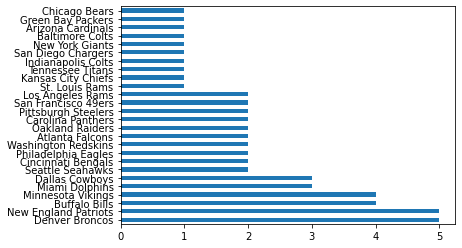

In [26]:
# Gráfico de barras para os perdedores:

df.Loser.value_counts().plot(kind='barh')